# 1. Vai trò của tiền xử lý ảnh

Khi phát triển một thuật toán phân loại ảnh chúng ta có thể gặp phải một số trường hợp không mong đợi như: Kết quả huấn luyện có độ chính xác rất cao khi sai số của mô hình áp dụng trên cả tập huấn luyện (train dataset) và tập phát triển (dev dataset) đều thấp. Nhưng khi áp dụng vào thực tiễn kết quả lại khá thấp. Có rất nhiều các nguyên nhân dẫn tới điều này và một trong số đó là:

* Các bức ảnh được huấn luyện khác xa so với những bức ảnh được người dùng đưa lên về nhiều khía cạnh như: độ phân giải, cường độ ánh sáng của ảnh, chất lượng ảnh, độ to nhỏ của vật thể trong ảnh, chiều, hướng và tư thế của vật thể bên trong ảnh.

* Có thể các bức ảnh được người dùng upload lên mặc dù cùng nhãn nhưng khác về tính chất so với các bức ảnh đã huấn luyện. Chẳng hạn một thuật toán về phân loại `dog and cat` nếu tập huấn luyện chỉ bao gồm những con mèo trưởng thành nhưng trên thực tế người dùng lại upload lên rất nhiều hình ảnh của mèo con khiến thuật toán nhầm lẫn.

* Đối với một số tác vụ phân loại ảnh khó, đòi hỏi chuyên gia gán nhãn, rất dễ nhận biết sai lầm như phát hiện bệnh về nhãn cầu. Một số ít các ảnh trong tập huấn luyện có thể bị gán sai nhãn. Do đó ảnh hưởng đến chất lượng của thuật toán khi dự báo.

* Bộ dữ liệu huấn luyện có kích thước quá nhỏ và không đại diện cho toàn bộ các class được huấn luyện.

* Phân phối của tập huấn luyện khác xa so với thực tế. Chẳng hạn tập huấn luyện chứa ảnh chó và mèo theo tỷ lệ 50:50 nhưng số lượng bức ảnh người dùng upload lên ảnh chó chiếm đa số theo tỷ lệ 90:10.
...

Và rất nhiều các nguyên nhân khác dẫn tới thuật toán hoạt động không được như kì vọng.

Khi đối mặt với trường hợp trên chúng ta cần phải tìm ra nguyên nhân thực sự là gì để từ đó có phương án thích hợp khắc phục các lỗi mô hình. Từ đó cải thiện độ chính xác khi áp dụng vào thực tiễn.

Các kĩ thuật để giải quyết các trường hợp lỗi như vậy đã được tổng hợp rất kĩ trong cuốn [Khao khát học máy - Andrew Ng](https://github.com/aivivn/Machine-Learning-Yearning-Vietnamese-Translation). Hiện tại sách đã được nhóm anh Tiệp và cộng đồng dịch ra Tiếng Việt khá đầy đủ. Bạn đọc có thể đọc từ chương 1 đến 16 để tìm hiểu cách thức xây dựng và phát triển những mô hình thông qua kinh nghiệm được tổng kết của tác giả.

Trong cuốn sách tác giả nêu ra nhiều hướng giải quyết như: Thay đổi tập dữ liệu huấn luyện và tập dữ liệu phát triển, thống kê lỗi và tìm cách giải quyết các lỗi chính mang lại cải thiện lớn, xác định tập huấn luyện/phát triển và phép đo đơn trị thích hợp ngay từ đầu cho bài toán, áp dụng các phương pháp và kiến trúc mô hình khác nhau,... 

Trong trường hợp dữ liệu không đủ lớn, dữ liệu gán nhãn với chi phí cao (như chuẩn đoán bệnh qua hình ảnh, phải tìm được bệnh nhân gặp đúng bệnh đó và bác sĩ chuyên khoa để chuẩn đoán), việc thay đổi tập dữ liệu là khá tốn chi phí. Có một phương pháp mà mình nghĩ rằng sẽ giúp gia tăng số lượng ảnh đầu vào. Đó chính là học tăng cường (data augumentation) sử dụng các biến đổi là `tiền xử lý hình ảnh` đầu vào. Đây là một phương pháp hiệu quả nhằm thay đổi tập dữ liệu huấn luyện và từ đó giúp cải thiện hiệu quả dự báo.

Vậy tiền xử lý dữ liệu ảnh là gì và có những phương pháp nào để thực hiện tiền xử lý ảnh, bài viết này sẽ giới thiệu tới các bạn một series các cách tiếp cận khác nhau của tiền xử lý ảnh trên cả 2 phương diện lý thuyết kết hợp thực hành. Các code sẽ được thực hiện trên `opencv`, một package khá tiện ích trong xử lý ảnh. Chúng ta bắt đầu nhé.


# 2. Tiền xử lý ảnh

## 2.1. Các biến đổi hình học.

Đây là tập hợp các phép biến đổi hình ảnh từ một hình dạng này sang một hình dạng khác thông qua việc làm thay đổi phương, chiều, góc, cạnh mà không làm thay đổi nội dung chính của bức ảnh.

### 2.1.1. Scale ảnh

Scale ảnh là việc chúng ta thay đổi kích thước dài, rộng của ảnh mà không làm thay đổi tính chất song song của các đoạn thẳng trên ảnh gốc so với các trục tọa độ X và Y. Chúng ta sẽ thay đổi kích thước của hình ảnh bằng hàm `cv2.resize()`.

origin image shape: (709, 621, 3)
scale image shape: (1418, 1242, 3)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f464735ecf8>,
 Text(0.5, 1.0, 'Scale Image'))

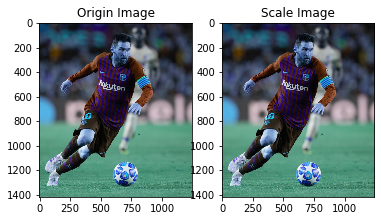

In [0]:
import cv2
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

url = 'https://i.imgur.com/1vzDG2J.jpg'
def _downloadImage(url):
  resp = requests.get(url)
  img = np.asarray(bytearray(resp.content), dtype="uint8")
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  return img
  
img = _downloadImage(url)
print('origin image shape: {}'.format(img.shape))

# Scale image bằng cách gấp đôi width and height
h, w = img.shape[:2]
imgScale = cv2.resize(img, (int(w*2), int(h*2)), interpolation = cv2.INTER_LINEAR)
print('scale image shape: {}'.format(imgScale.shape))

plt.subplot(121),plt.imshow(imgScale),plt.title('Origin Image')
plt.subplot(122),plt.imshow(imgScale),plt.title('Scale Image')

Như vậy bức ảnh đã được resize về một kích thước gấp đôi cả về chiều `width` và `height` nhưng không làm nội dung ảnh thay đổi. Resize ảnh rất thường xuyên được sử dụng trong các mô hình deep learning phân loại ảnh vì mỗi một mô hình đều có một kích thước đầu vào tiêu chuẩn. Chẳng hạn như `Lenet` là kích thước `32x32x3` và `Alexnet` là `224x224x3`.

### 2.1.2. Dịch chuyển ảnh (Translation) 
Dịch chuyển ảnh thường được thực hiện trong trường hợp bạn muốn di chuyển ảnh đến các vị trí khác nhau như các góc trái, phải, ở giữa, bên trên, bên dưới. Để dịch chuyển hình ảnh chúng ta phải xác định được $(t_x, t_y)$ là các giá trị di chuyển ảnh theo trục $x$ và $y$. Ma trận dịch chuyển $\mathbf{M}$ sẽ có dạng như bên dưới:

$$\mathbf{M} = \begin{bmatrix} 1 & 0 & t_x \\
0 & 1 & t_y\end{bmatrix}$$

Khi đó áp dụng hàm `cv2.warpAffine()` với đầu vào là ma trận dịch chuyển $\mathbf{M}$ ta thu được kết quả như bên dưới.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f46493ac0b8>,
 Text(0.5, 1.0, 'Translate to Up Left'))

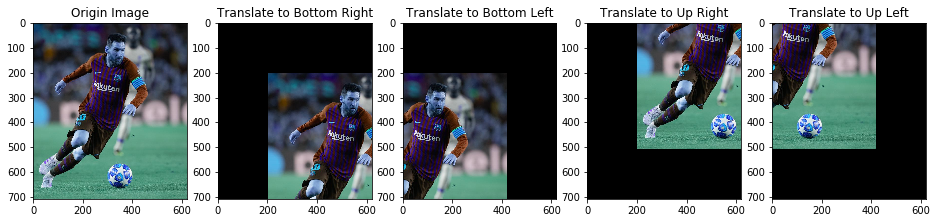

In [0]:
rows, cols = img.shape[:2]
# Dịch chuyển hình ảnh xuống góc dưới bên phải
tx, ty = (200, 200)
M1 = np.array([[1, 0, tx], 
              [0, 1, ty]], dtype=np.float32)
tran1 = cv2.warpAffine(img, M1, (cols, rows))

# Dịch chuyển hình ảnh xuống góc dưới bên trái
M2 = np.array([[1, 0, -tx], 
              [0, 1, ty]], dtype=np.float32)
tran2 = cv2.warpAffine(img, M2, (cols, rows))

# Dịch chuyển hình ảnh xuống góc dưới bên trái
M3 = np.array([[1, 0, tx], 
              [0, 1, -ty]], dtype=np.float32)
tran3 = cv2.warpAffine(img, M3, (cols, rows))

# Dịch chuyển hình ảnh xuống góc dưới bên trái
M4 = np.array([[1, 0, -tx], 
              [0, 1, -ty]], dtype=np.float32)
tran4 = cv2.warpAffine(img, M4, (cols, rows))

plt.figure(figsize=(16, 4))
plt.subplot(151),plt.imshow(img),plt.title('Origin Image')
plt.subplot(152),plt.imshow(tran1),plt.title('Translate to Bottom Right')
plt.subplot(153),plt.imshow(tran2),plt.title('Translate to Bottom Left')
plt.subplot(154),plt.imshow(tran3),plt.title('Translate to Up Right')
plt.subplot(155),plt.imshow(tran4),plt.title('Translate to Up Left')

### 2.1.2. Xoay ảnh (Rotation)

Phép xoay của một hình ảnh tương ứng với một góc $\theta$ đạt được bằng một ma trận dịch chuyển $\mathbf{M}$ như sau:

$$\mathbf{M} = \begin{bmatrix} cos(\theta) & -sin(\theta) \\
sin(\theta) & cos(\theta)\end{bmatrix}$$

Ngoài ra OpenCV cung cấp một phép scaled rotation với khả năng điều chỉnh tâm của phép xoay để bạn có thể xoay theo bất kì vùng nào mà bạn ưa chuộng hơn. Phép dịch chuyển ma trận được đưa ra như sau:

$$\begin{bmatrix} \alpha & \beta & (1-\alpha)c_x-\beta c_y \\
-\beta & \alpha & \beta c_x+(1-\alpha)c_y\end{bmatrix}$$

trong đó:

$$\alpha = scale.cos(\theta) \\
\beta = scale.sin(\theta)$$

Để tìm ra ma trận transform có thể sử dụng hàm `cv2.getRotationMatrix2D()` của OpenCV. Trong hàm này chúng ta cần xác định tâm của phép xoay (đối số `center`), góc xoay (`angle`) và tham số phóng đại kích thước ảnh (`scale`).

Bên dưới là một ví dụ xoay ảnh kích thước 45 độ tại tâm của ảnh.



(<matplotlib.axes._subplots.AxesSubplot at 0x7f4648a2c710>,
 Text(0.5, 1.0, 'Rotate 20 at bottom right corner'))

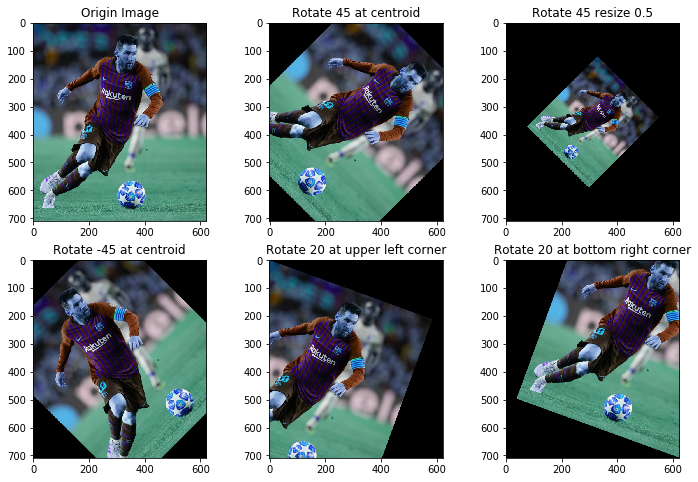

In [0]:
# Xoay ảnh kích thước 45 độ tại tâm của ảnh, độ phóng đại ảnh không đổi.
M5 = cv2.getRotationMatrix2D(center = (cols/2,rows/2), angle=-45, scale=1)
tran5 = cv2.warpAffine(img, M5, (cols,rows))

# Xoay ảnh kích thước 45 độ tại tâm của ảnh và độ phóng đại giảm 1/2
M6 = cv2.getRotationMatrix2D(center = (cols/2,rows/2), angle=-45, scale=0.5)
tran6 = cv2.warpAffine(img, M6, (cols,rows))

# Xoay ảnh kích thước -45 độ tại tâm của ảnh
M7 = cv2.getRotationMatrix2D(center = (cols/2,rows/2), angle=45, scale=1)
tran7 = cv2.warpAffine(img, M7, (cols,rows))

# Xoay ảnh kích thước 20 độ tại góc trên bên trái
M8 = cv2.getRotationMatrix2D(center = (0, 0), angle=-20, scale=1)
tran8 = cv2.warpAffine(img, M8, (cols,rows))

# Xoay ảnh kích thước 20 độ tại góc dưới bên phải
M9 = cv2.getRotationMatrix2D(center = (cols,rows), angle=-20, scale=1)
tran9 = cv2.warpAffine(img, M9, (cols,rows))

plt.figure(figsize=(12, 8))
plt.subplot(231),plt.imshow(img),plt.title('Origin Image')
plt.subplot(232),plt.imshow(tran5),plt.title('Rotate 45 at centroid')
plt.subplot(233),plt.imshow(tran6),plt.title('Rotate 45 resize 0.5')
plt.subplot(234),plt.imshow(tran7),plt.title('Rotate -45 at centroid')
plt.subplot(235),plt.imshow(tran8),plt.title('Rotate 20 at upper left corner')
plt.subplot(236),plt.imshow(tran9),plt.title('Rotate 20 at bottom right corner')

### 2.1.3. Biến đổi Affine

Trong biến đổi affine, toàn bộ các đường thẳng song song trong bức ảnh gốc sẽ trở thành song song ở ảnh đầu ra. Để tìm ma trận chuyển vị, chúng ta cần xác định ra 3 điểm từ ảnh đầu vào và tọa độ tương ứng của chúng trong hình ảnh đầu ra. Hàm `cv2.getAffineTransform` sẽ tạo ra được một ma trận `2x3` được truyền vào hàm `cv2.warpAffine`.

Kiểm tra ví dụ bên dưới, chúng ta cũng nhìn vào các điểm mà tôi lựa chọn (được đánh dấu x, màu trắng).



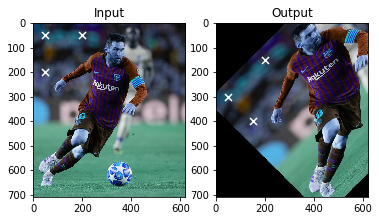

In [0]:
rows,cols,ch = img.shape

pts1 = np.float32([[50,50], [200,50], [50,200]])
# pts2 = np.float32([[50,100], [200,50], [50,200]])
pts2 = np.float32([[50,300], [200,150], [150, 400]])

M = cv2.getAffineTransform(pts1,pts2)
imageAffine = cv2.warpAffine(img,M,(cols,rows))

# Hiển thị hình ảnh gốc và 3 điểm ban đầu trên ảnh
plt.subplot(121),plt.imshow(img),plt.title('Input')
for (x, y) in pts1:
  plt.scatter(x, y, s=50, c='white', marker='x')

# Hiển thị hình ảnh sau dịch chuyển và 3 điểm mục tiêu của phép dịch chuyển.
plt.subplot(122),plt.imshow(imageAffine),plt.title('Output')
for (x, y) in pts2:
  plt.scatter(x, y, s=50, c='white', marker='x')

Như vậy sử dụng phép biến đổi Affine có thể giúp ta tạo thành nhiều biến thể, tư thế khác nhau cho cùng một vật thể. Thường được áp dụng trong Data Augumentation để làm giàu dữ liệu trong trường hợp số lượng ảnh không nhiều. Chẳng hạn với ảnh mặt người đang chụp nghiêng ta có thể xoay theo các chiều sao cho từ mặt nghiêng trở thành mặt chính diện hoặc như trong hình trên, hình ảnh messi đang chạy dáng nghiêng đã được chuyển sang chạy dáng thẳng đứng.

Một số nghiên cứu chỉ ra rằng khi áp dụng phương pháp Data Augumentation thì độ chính xác của thuật toán với số lượng ảnh huấn luyện nhỏ có thể không thua kém những thuật toán được huấn luyện trên nhiều dữ liệu hơn về độ chính xác.

### 2.1.4. Biến đổi phối cảnh (Perspective Transform)

Để biến đổi phối cảnh thì chúng ta cần một ma trận biến đổi `3x3`. Đường thẳng sẽ giữ nguyên là đường thẳng sau biến đổi. Để tìm ra ma trận biến đổi này, chúng ta cần tìm ra 4 điểm trong ảnh đầu vào tương ứng với các điểm trong ảnh đầu ra. Trong số 4 điểm này, không có bất kì 3 điểm nào thẳng hàng. Sau đó ma trận biến đổi có thể được thiết lập thông qua hàm số `cv2.getPerspectiveTransform`. Và áp dụng `cv2.warpPerspective` với ma trận biến đổi `3x3`.

Xem code bên dưới.


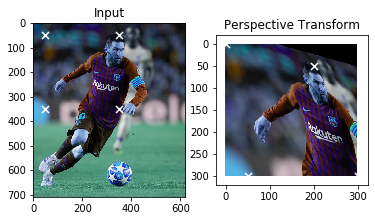

In [0]:
pts1 = np.float32([[50,50],[350,50],[50,350],[350,350]])
pts2 = np.float32([[0,0],[200,50],[50,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
for (x, y) in pts1:
  plt.scatter(x, y, s=50, c='white', marker='x')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective Transform')
for (x, y) in pts2:
  plt.scatter(x, y, s=50, c='white', marker='x')
plt.show()

Như vậy phép biến đổi này cũng gần giống như phép biến đổi Affine. Khác biệt đó là nó chỉ trả ra bức ảnh là biến đổi trên vùng ảnh bị giới hạn trong tọa độ của 4 điểm gốc thay vì biến đổi trên toàn bộ bức ảnh ban đầu như phép biến đổi Affine. Trong trường hợp muốn crop ảnh ta sẽ xác định trước tọa độ của 4 góc và sử dụng phép biến đổi phối cảnh giữa 4 điểm với chính các điểm đó.

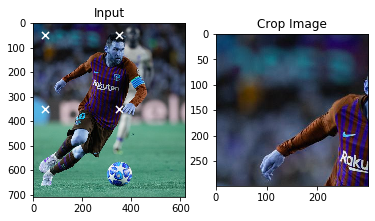

In [0]:
pts1 = np.float32([[50,50],[350,50],[50,350],[350,350]])

M = cv2.getPerspectiveTransform(pts1,pts1)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
for (x, y) in pts1:
  plt.scatter(x, y, s=50, c='white', marker='x')
plt.subplot(122),plt.imshow(dst),plt.title('Crop Image')
plt.show()

## 2.2. Làm mịn ảnh (smoothing images)

Chúng ta có thể lọc nhiễu cho ảnh bằng bộ lọc tích chập 2 chiều (2D convolution), hoặc làm mờ ảnh bằng bộ lọc trung bình hoặc Gaussian Filtering.

### 2.2.1. Bộ lọc tích chập 2D (2D convolution)

Như đối với tín hiệu 1 chiều, các hình ảnh cũng được lọc với đa dạng các bộ lọc truyền dẫn thấp (low-pass filters LPF), bộ lọc truyền dẫn cao (high-pass fiters HPF). Một HPF sẽ giúp ta tìm ra các cạnh trong một hình ảnh, còn LPF sẽ lọc nhiễu cho ảnh và làm mờ ảnh.

OpenCV đưa ra một hàm `cv2.filter2D()` để tích chập một bộ lọc (kernel) với một hình ảnh. Chẳng hạn như bên dưới chúng ta sẽ thử lọc trung bình trên một bức ảnh. thông qua phép nhân tích chập với một bộ lọc trung bình kích thước 5x5 như bên dưới.

$$K = \frac{1}{25}
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
\end{bmatrix}$$

Khi đó mỗi một vùng ảnh cục bộ (local region) kích thước 5x5 trên ảnh gốc, các pixels sẽ được lấy giá trị bằng nhau và bằng trung bình của toàn bộ các pixels trên vùng ảnh. Dịch chuyển bộ lọc $K$ trên toàn bộ các vùng ảnh gốc như một phép tích chập 2 chiều thông thường ta sẽ được ảnh smoothing. Cụ thể như code bên dưới.

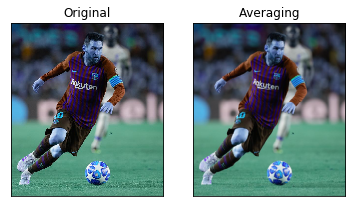

In [0]:
import cv2
import numpy as np

kernel = np.ones((5,5),np.float32)/25
imgSmooth = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgSmooth),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

Ta thấy ảnh bên trái sắc nét, ảnh bên trái mờ hơn do đã lọc nhiễu.

### 2.2.2. Làm mờ ảnh (Image blurring)
Các ảnh mờ có thể thu được thông qua phép tích chập hình ảnh với các bộ lọc LPF. Đây là những bộ lọc rất hữu ích trong loại bỏ nhiễu. Trên thực tế nó loại bỏ các nội dung tần số cao (chẳng hạn như nhiễu, các cạnh) khỏi hình ảnh dẫn đến các cạnh bị làm mờ khi bộ lọc được áp dụng. Có rất nhiều kĩ thuật làm mờ ảnh mà không làm mờ các cạnh. OpenCV cung cấp 4 kĩ thuật làm mờ chủ yếu.

**1\. Trung bình (Average)**

Tương tự như tích chập 2 chiều, chúng cũng sử dụng một ma trận vuông 2 chiều gồm toàn giá trị 1 để lấy trung bình trên các vùng cục bộ. Chúng ta có thể thực hiện thông qua các hàm `cv2.blur()` và `cv2.boxFilter()`. Chẳng hạn như ta làm như bên dưới:

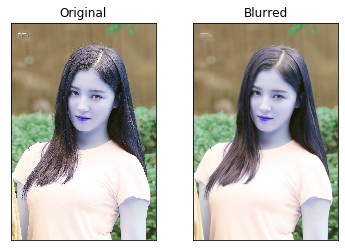

In [0]:
url = 'https://photo-2-baomoi.zadn.vn/w1000_r1/2019_05_10_351_30668071/06856d2daf6c46321f7d.jpg'
img = _downloadImage(url)

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

**2\. Bộ lọc Gausian**

Bộ lọc gaussian được khởi tạo thông qua hàm `cv2.GaussianBlur()`. Chúng ta cần xác định độ lệch chuẩn theo 2 phương X và Y là $\sigma_x$ và $\sigma_y$. Bộ lọc Gaussian rất hiệu quả trong việc xóa bỏ noise khỏi hình ảnh.

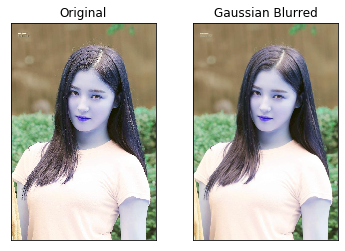

In [0]:
gaussian_img = cv2.GaussianBlur(img, (5, 5), 0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gaussian_img),plt.title('Gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Ngoài ra ta còn có các bộ lọc:

* median: Được khởi tạo thông qua hàm `cv2.medianBlur()`. Cũng tương tự như bộ lọc trung bình, nhưng thay vì tính mean thì ta tính toán các median của toàn bộ các pixels trên một vùng cục bộ và thay thế các điểm ảnh trên vùng cục bộ bằng median.

* bilateral: Được khởi tạo thông qua hàm `cv2.bilateralFilter()`. Các bộ lọc trình bày trước đó cho thấy có xu hướng làm mờ cạnh. Tuy nhiên bộ lọc này lại chỉ remove nhiễu mà vẫn bảo tồn được các cạnh.

Bên dưới là kết quả áp dụng các bộ lọc này:

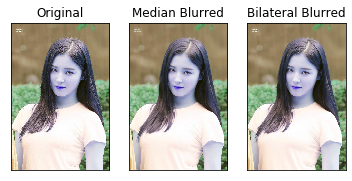

In [0]:
median_img = cv2.medianBlur(img, 5, 0)
bilateral_img = cv2.bilateralFilter(img, 9, 75, 75)

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(median_img),plt.title('Median Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(bilateral_img),plt.title('Bilateral Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 2.3. Phương pháp Canny phát hiện edge

Canny là một phương pháp phát hiện edge phổ biến được phát triển bởi John F.Canny vào năm 1986. Nó là một phương pháp được thực hiện qua nhiều bước như sau:

**1\. Giảm nhiễu ảnh**

Bởi vì phát hiện edge dễ gây nhiễu trong ảnh nên bước đầu tiên giảm nhiễu cho ảnh bằng bộ lọc Gausian kích thước 5x5. Về bộ lọc Gaussian xem lại mục `2.2. làm mịn ảnh`.

**2\. Tìm kiếm cường độ gradient của bức ảnh**

Trước khi đọc phần này, các bạn vẫn còn nhớ [mục 2.1.1 - tính toán gradient descent ở thuật toán HOG](https://phamdinhkhanh.github.io/2019/11/22/HOG.html) chứ? Ảnh được làm mịn sau đó được lọc qua bộ lọc Sobel theo cả 2 chiều dọc và ngang để thu được đạo hàm bậc 1 theo 2 phương x và y lần lượt là $G_x$ và $G_y$. Từ những hình ảnh này, chúng ta có thể tìm được độ dài cạnh gradient và phương cho mỗi pixel như bên dưới:

$$|G| = \sqrt{G_x^2 + G_y^2}$$
$$\theta = \arctan(\frac{G_y}{G_x})$$

Phương gradient luôn luôn vuông góc với các cạnh. Nó được làm tròn thành một trong bốn góc biểu diễn trục dọc, ngang và 2 phương của đường chéo.

**3\. Triệt tiêu Phi tối đa (Non-maximum Suppression)**

Triệt tiêu phi tối đa (Non-maximum Suppression) hiểu đơn giản là một thuật toán loại bỏ nếu như không phải là giá trị lớn nhất. Trong object detection, để phát hiện các bounding box thì ta sẽ tìm ra trong tập hợp các bounding box mà tỷ lệ overlap lên anchor box lớn hơn 0.5 một bounding box có kích thước lớn nhất và xóa các bounding box còn lại.

Đối với tìm edge cũng vậy. Sau khi nhận được độ lớn của gradient và phương, một lượt quét được thực hiện trên các bức ảnh để loại bỏ bất kì pixels nào không tạo thành cạnh. Để thực hiện điều đó, tại mỗi pixel, pixel được kiểm tra xem liệu nó có là một cực đại cục bộ trong số các lân cận của nó theo phương của gradient. Như hình ảnh bên dưới.

![](https://imgur.com/pIhXmC2.png)

**Hình 1**: Phương pháp xác định edge của thuật toán canny. 
> Điểm A nằm trên cạnh (theo chiều dọc). Phương gradient là norm chuẩn của cạnh. Điểm B và C là điểm nằm trên phương gradient. Nếu điểm A được kiểm tra với điểm B và C để xem liệu nó có là một cực đại cục bộ. Nếu như vậy, nó được xem xét giữ lại cho bước tiếp theo, trái lại thì nó sẽ bị triệt tiêu (bằng cách thiết lập bằng 0).

**4\. Ngưỡng độ trễ (Hysteresis Thresholding)**

Ở bước này ta sẽ quyết định xem toàn bộ các cạnh có những cạnh nào là thực sự và những cạnh nào không thông qua việc thiết lập ngưỡng gồm 2 giá trị, _minVal_ và _maxVal_. Một cạnh bất kì có cường độ gradient lớn hơn _maxVal_ thì chắc chắn là các cạnh và những cạnh có cường độ gradient nhỏ hơn sẽ không được coi là cạnh. Nếu một cạnh mà có những điểm ảnh nằm trong ngưỡng này thì có thể được xem xét thuộc cùng một cạnh hoặc không thuộc dựa trên sự kết nối của các điểm với nhau. Cụ thể như hình bên dưới.

![](https://imgur.com/NqLpQIU.jpg)

**Hình 2:** Phương pháp triệt tiêu cạnh theo ngưỡng cường độ gradient.
> Trên hình vẽ là 2 cạnh A màu đỏ và B màu xanh. Cạnh A do có các điểm có cường độ gradient nằm trên _maxVal_ nên được xem là những cạnh đạt tiêu chuẩn. Mặc dù trên cạnh A có những điểm nằm trong ngưỡng từ _minVal_ tới _maxVal_. Cạnh B được xem là không đạt tiêu chuẩn vì toàn bộ các điểm nằm trên cạnh B đều nằm trong ngưỡng _minVal_ và _maxVal_. Như vậy cạnh A sẽ được giữ lại và cạnh B sẽ được xóa bỏ.

Bước này chúng ta cũng loại bỏ các điểm pixels là nhiễu (thực chất là các cạnh nhưng quá ngắn) dựa trên giả định rằng các cạnh là những đường dài.

Như vậy các bạn đã hình dung được nguyên lý hoạt động của thuật toán Canny để tìm kiếm các cạnh rồi chứ. Vậy openCV hỗ trợ thuật toán Canny để phát hiện cạnh như thế nào. Cùng thực hiện như bên dưới.

**Thực hành thuật toán Canny trên openCV**

Tất cả các bước trên được openCV gói gọn trong một hàm số là `cv2.Canny()`. Trong hàm số này chúng ta sẽ khai báo tham số đầu tiên là hình ảnh đầu vào, tham số thứ 2 và thứ 3 lần lượt là ngưỡng _minVal_ và _maxVal_. 




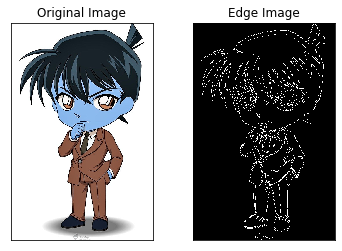

In [0]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt

url = 'https://i.pinimg.com/736x/6d/9c/e0/6d9ce08209b81b28c6ea64012e070003.jpg'
img = _downloadImage(url)

edges = cv2.Canny(img, 100, 200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Như vậy chúng ta thấy toàn bộ các đường nét chính của nhân vật truyện tranh Conan đã được thuật toán Canny giữ lại.

Tìm hiểu thêm về:
1. [Thuật toán Canny - wikipedia](https://en.wikipedia.org/wiki/Canny_edge_detector)
2. [Hướng dẫn thuật toán Canny trong phát hiện cạnh - Bill Green](http://dasl.mem.drexel.edu/alumni/bGreen/www.pages.drexel.edu/_weg22/can_tut.html)

## 2.4. Contour

### 2.4.1. Xác định các contour
Contour được hiểu đơn giản là một đường cong liên kết toàn bộ các điểm liên tục (dọc theo đường biên) mà có cùng màu sắc hoặc giá trị cường độ. Contour rất hữu ích trong phân tích hình dạng, phát hiện vật thể và nhận diện vật thể. Một số lưu ý khi sử dụng contour.

* Để độ chính xác cao hơn thì nên sử dụng hình ảnh nhị phân (chỉ gồm 2 màu đen và trắng). Do đó trước khi phát hiện contour thì nên áp dụng threshold hoặc thuật toán canny để chuyển sang ảnh nhị phân.

* Hàm `findContour` và `drawContour` sẽ thay đổi hình ảnh gốc. Do đó nếu bạn muốn hình ảnh gốc sau khi tìm được contour, hãy lưu nó vào một biến khác.

* Trong openCV, tìm các contours như là tìm các vật thể màu trắng từ nền màu đen. Do đó hãy nhớ rằng, object cần tìm nên là màu trắng và background nên là màu đen.

Bây giờ ta sẽ cùng tìm các contours cho một ảnh nhị phân.

In [0]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt

# Đọc hình ảnh
# url = 'https://imgur.com/7J223M7.png'
url = 'https://c4.wallpaperflare.com/wallpaper/279/111/762/close-up-pile-pipes-round-wallpaper-preview.jpg'
resp = requests.get(url)
img = np.asarray(bytearray(resp.content), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)

# Lọc ảnh nhị phân bằng thuật toán canny
imgCanny = cv2.Canny(img, 100, 200)

contours, hierarchy = cv2.findContours(imgCanny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Có 3 tham số trong hàm `cv2.findContours()`, đầu tiên là hình ảnh gốc, thứ 2 là phương pháp trích xuất contours, thứ 3 là phương pháp xấp xỉ contour. Kết quả trả ra là hình ảnh và contours. Trong đó contours là một list của toàn bộ các contours xác định trong hình ảnh. Mỗi một contour là một numpy array của các tọa độ $(x, y)$ của các điểm biên trong object.

Lưu ý rằng ở một số version openCV thì cách trích xuất các contours sẽ có thể sẽ thêm/bớt một vài biến output. Trong trường hợp gặp lỗi bạn đọc có thể tìm hiểu [fix lỗi sử dụng hàm findContours ở các version openCV - stackoverflow](https://stackoverflow.com/questions/55854810/opencv-version-4-1-0-drawcontours)

Sau khi trích xuất được các contour thì chúng ta sẽ vẽ các contour đó thông qua hàm `cv2.drawContours()`. Nó có thể được sử dụng để vẽ bất kì hình dạng nào mà bạn có các tọa độ điểm biên của nó. Các tham số chính của hàm số này:

* Tham số đầu tiên: Hình ảnh gốc.
* Tham số thứ 2: List các contours cần vẽ. Mỗi một phần tử của list là array tọa độ các điểm biên của một contour.
* Tham số thứ 3: Index của contour. Chẳng hạn chúng ta chỉ muốn lựa chọn ra một contour ở những index nhất định thuộc list contours thì khai báo index tại đây. Muốn vẽ toàn bộ các contours thì thiết lập giá trị cho tham số này bằng -1.

Thành phần còn lại sẽ chính là tham số về màu sắc, độ dày của contour.

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

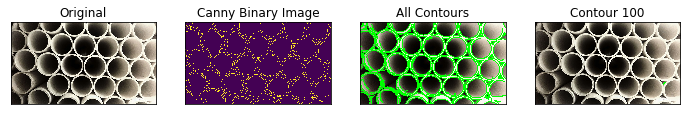

In [0]:
# Vì drawContours sẽ thay đổi ảnh gốc nên cần lưu ảnh sang một biến mới.
imgOrigin = img.copy()
img1 = img.copy()
img2 = img.copy()

# Vẽ toàn bộ contours trên hình ảnh gốc
cv2.drawContours(img1, contours, -1, (0, 255, 0), 3)

# Vẽ chỉ contour thứ 4 trên hình ảnh gốc
cv2.drawContours(img2, contours, 100, (0, 255, 0), 3)

plt.figure(figsize = (12, 3))
plt.subplot(141),plt.imshow(imgOrigin),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(imgCanny),plt.title('Canny Binary Image')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img1),plt.title('All Contours')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(img2),plt.title('Contour 4')
plt.xticks([]), plt.yticks([])


### 2.4.2. Các đặc trưng của contour

Ở trên chúng ta đã biết các trích suất ra các contour của một hình ảnh. Tiếp theo chúng ta sẽ tìm hiểu xem các đặc trưng như kích thước dài, rộng, diện tích, tâm,... của một contour là gì và có thể tính toán chúng trên openCV ra sao.

**Moment**

Các moments của hình ảnh sẽ giúp ta tính toán tâm của vật thể và diện tích của vật thể. Có thể xem thêm tại [Image moment - wikipedia](https://en.wikipedia.org/wiki/Image_moment).


Hàm `cv2.moments()` sẽ hỗ trợ ta thực hiện tính toán các moments. Kết quả trả về là một dictionary như sau:

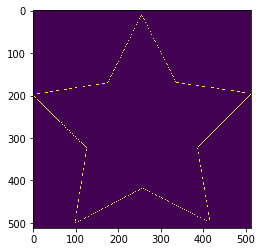

In [0]:
import cv2
import numpy as np

url = 'https://image.flaticon.com/icons/png/512/130/130188.png'
img = _downloadImage(url)

# Khởi tạo ảnh nhị phân canny
imgCanny = cv2.Canny(img, 100, 255)
plt.imshow(imgCanny)
# Tìm kiếm contours trên ảnh nhị phân từ bộ lọc canny
contours, hierarchy = cv2.findContours(imgCanny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


Moment values of contour 0: {'m00': 129.5, 'm10': 9821.833333333332, 'm01': 35877.166666666664, 'm20': 1204998.5833333333, 'm11': 3155542.208333333, 'm02': 10432159.25, 'm30': 218048987.95000002, 'm21': 443324957.01666665, 'm12': 1071073460.4833333, 'm03': 3214254682.55, 'mu20': 460068.77616902627, 'mu11': 434464.5907872161, 'mu02': 492614.1687044203, 'mu30': 56869583.044915825, 'mu21': 43584319.12291357, 'mu12': 39122522.03416099, 'mu03': 51138718.292099, 'nu20': 27.43362658094103, 'nu11': 25.90686428569736, 'nu02': 29.374288916648254, 'nu30': 297.99269854672315, 'nu21': 228.3788305516631, 'nu12': 204.9993210906005, 'nu03': 267.963361926664}


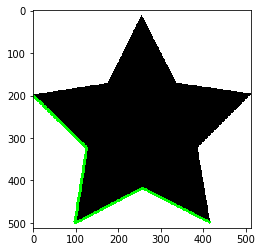

In [0]:
# Vẽ contour 0 trên hình ảnh gốc
img1 = img.copy()
cv2.drawContours(img1, contours, 0, (0, 255, 0), 5)
plt.imshow(img1)

# Lấy ra contour 0
cnt = contours[0]
M = cv2.moments(cnt)
print('Moment values of contour 0: {}'.format(M))

Từ đây chúng ta có thể tính ra được tâm của contour 0 theo công thức:

$$c_x = \frac{M_{10}}{M_{00}}, c_y = \frac{M_{01}}{M_{00}}$$

Centroid position (75, 277)


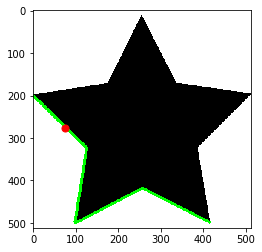

In [0]:
# Tính toán tâm của contour 0
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print('Centroid position ({}, {})'.format(cx, cy))

# Vẽ biểu đồ tâm contour 0 và contour 0
plt.imshow(img1)
plt.scatter(cx, cy, s=50, c='red', marker='o')

Để biết diện tích của contour ta dùng hàm `cv2.contourArea()` hoặc phần tử **M['m00']**

In [0]:
area = cv2.contourArea(cnt)
print('area of contour 0: {}'.format(area))

area of contour 0: 129.5


### 2.4.3. Bounding box

Khác với contour là một đường cong nối liền các điểm có cùng cường độ hoặc màu sắc. Bounding box là một đường biên đóng bao quanh vật thể. Bounding box có thể có nhiều hình dạng khác nhau trong đó có các hình dạng chính như: chữ nhật, tam giác, tròn, ellipse. Một bounding box có thể được xác định thông qua một contour. Bên dưới là các bounding box phổ biến.

**1\. Bounding box hình chữ nhật**

Cái tên nói lên tất cả, bounding box hình chữ nhật sẽ chỉ có một định dạng là hình chữ nhật và tọa độ của nó được xác định thông qua tọa độ của một đỉnh và chiều width, height. Ngoài ra đối với một số hình chữ nhật nằm nghiêng còn có thêm góc xoay. Có 2 dạng bounding box hình chữ nhật cho một object đó là Bounding box hình chữ nhật đứng (các cạnh song song với các trục tung và trục hoành) và hình chữ nhật xoay (các cạnh không vuông góc với trục tung và trục hoành). Bounding box hình chữ nhật đứng phù hợp với các vật thể có tư thế thẳng hoặc ngang. Các trường hợp vật thể nằm chéo sẽ phù hợp với hình chữ nhật xoay.

Hàm `cv2.boundingRect()` giúp tìm ra Bounding box hình chữ nhật đứng. Hàm `cv2minAreaRect()` tìm ra Bounding box diện tích nhỏ nhất bao quanh một contour xác định. Do đó nó bao gồm cả những bounding box hình chữ nhật xoay.

**Vẽ bounding box hình chữ nhật đứng**

Ví dụ chúng ta sẽ tìm ra các Bounding box hình chữ nhật đứng đối với một contour như sau:

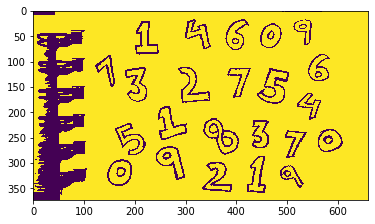

In [0]:
img = _downloadImage('https://i0.wp.com/cdn-images-1.medium.com/max/2400/1*LmxW8FDfXZJl5yvESvjP7Q.jpeg?resize=660%2C373&ssl=1')
# Chuyển đổi sang ảnh gray
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Chuyển sang ảnh nhị phân
_, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(img)
# Tìm kiếm contours trên ảnh nhị phân
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Sử dụng hàm `cv.contourArea()` để tìm ra diện tích các contours và sắp xếp thứ tự diện tích từ cao xuống thấp.

In [0]:
# Tìm ra diện tích của toàn bộ các contours
area_cnt = [cv2.contourArea(cnt) for cnt in contours]
area_sort = np.argsort(area_cnt)[::-1]
# Top 5 contour có diện tích lớn nhất
area_sort[:5]

array([45, 78, 89, 93, 63])

Từ contour, ta sẽ xác định tọa độ góc trên bên trái và độ dài cạnh width, height của contour thông qua hàm `cv2.boundingRect()`. Từ đó vẽ bounding box hình chữ nhật đứng lên hình ảnh gốc bằng cách sử dụng hàm `cv.rectangle()` như bên dưới:

centroid: (334, 211), (width, height): (73, 74)


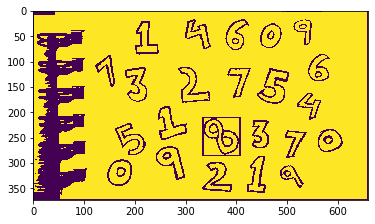

In [0]:
# Vẽ bounding box cho contours có diện tích lớn thứ 2
cnt = contours[area_sort[1]]
x,y,w,h = cv2.boundingRect(cnt)
print('centroid: ({}, {}), (width, height): ({}, {})'.format(x, y, w, h))
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)

**Vẽ bounding box hình chữ nhật xoay diện tích nhỏ nhất bao quanh một contour**

Để vẽ một bounding box có diện tích tối thiểu bao quanh một contour xác định chúng ta sử dụng hàm `cv2.minAreaRect()`. Hàm này sẽ trả về một cấu trúc Box 2 chiều bao gồm các thông số: Tọa độ đỉnh trên cùng bên trái (x, y), (width, height), góc xoay. Nhưng để vẽ hình chữ nhật thì ta cần tọa độ của 4 góc. Thông qua hàm `cv2.boxPoint()` ta sẽ chuyển các hình dữ nhật thành các box 2D. Cụ thể như sau:

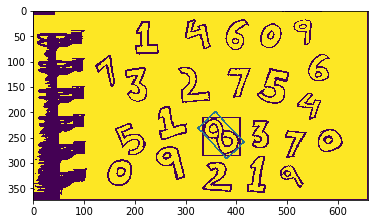

In [0]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img = cv2.drawContours(img,[box],0,(100,100,100),2)
plt.imshow(img)

**2\. Bounding box các hình dạng khác**

Ngoài ra opencv cũng hỗ trợ vẽ các bouding các hình dạng khác có diện tích tối thiểu bao quanh một contour như sau:

* Hình tròn: hàm `cv2.minEnclosingCircle()`

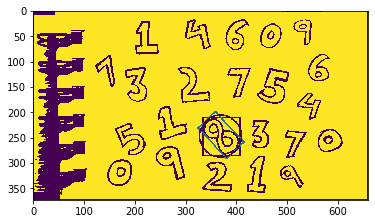

In [0]:
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)
plt.imshow(img)

* Hình Ellipse: hàm `cv2.fitEllipse()`

Do số 8 đã nhiều hình rồi nên để quan sát rõ hơn ta sẽ chuyển qua một số khác.

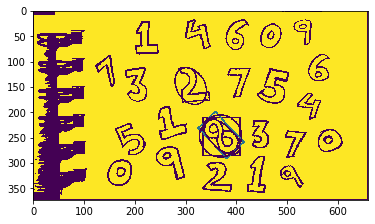

In [0]:
# Lấy contour có diện tích lớn thứ 3
cnt = contours[area_sort[3]]
ellipse = cv2.fitEllipse(cnt)
img = cv2.ellipse(img,ellipse,(0,255,0),2)
plt.imshow(img)

* Đường thẳng: Hàm `cv2.fitLine()`

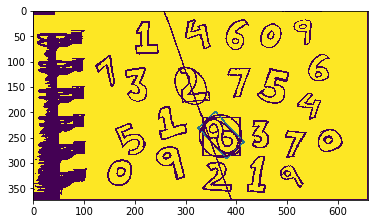

In [0]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)
plt.imshow(img)

### 2.4.5. Các thuộc tính của contour

Ở đây, chúng ta sẽ học cách trích xuất một số thuộc tính thường xuyên được sử dụng của một vật thể như độ cô đặc (solidity), đường kính (diameter), ảnh mặt nạ (mask image), trung bình cường độ (mean intensity),....

**1\. Tỷ lệ cạnh (aspect ratio)**

Như chúng ta đã làm quen ở [Bài 13 - Model SSD trong Object Detection](https://phamdinhkhanh.github.io/2019/10/05/SSDModelObjectDetection.html). Tỷ lệ hướng (Aspect ratio) là tỷ lệ kích thước chiều dài và chiều rộng theo công thức:

$$\text{AR} = \frac{W}{H}$$

với $W, H$ lần lượt là width và height.

Aspect ratio sẽ cho ta biết hình dạng tương đối của bounding box là cao dẹt hay rộng thấp.

In [0]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
print('aspect ratio: {}'.format(aspect_ratio))

aspect ratio: 0.9041095890410958


**2\. Độ phủ (extent)**

Chúng ta muốn biết độ phủ của contour lên bounding box bằng cách tính tỷ lệ diện tích giữa chúng theo công thức:

$$\text{Extent} = \frac{S_{contour}}{S_{area}}$$

Trong đó $S_{contour}$ là diện tích của contour và $S_{area}$ là diện tích của bounding box.


In [0]:
# Tính diện tích của contour
area = cv2.contourArea(cnt)
# Tính diện tích bouding box
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
# Tính độ phủ
extent = float(area)/rect_area
print('Extent: {}'.format(extent))

Extent: 0.4712536322125363


**3\. Độ cô đặc (Solidity)**

Cũng gần như độ phủ nhưng mẫu số thay vì là bounding box sẽ là một hình đa diện lồi (convex hull area) bao quanh vật thể.

$$\text{Solidity}=\frac{S_{contour}}{S_{CVhull}}$$

Với $S_{contour}, S_{CVhull}$ lần lượt là diện tích contour và diện tích đa diện lồi.

In [0]:
area = cv2.contourArea(cnt)
# Khởi tạo một đa diện lồi bao quanh contour
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
# Tính toán độ cô đặc
solidity = float(area)/hull_area
print('Solidity : {}'.format(solidity))

Solidity : 0.6777611940298508


**4\. Đường kính tương đương (Equivalent Diameter)**

Đường kính tương đương là đường kính của một hình tròn mà diện tích của nó bằng với diện tích contour.

$$\text{ED} = \sqrt{\frac{4\times S_{contour}}{\pi}}$$

In [0]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print('Equivalent Diameter : {}'.format(equi_diameter))

Equivalent Diameter : 53.76700090502712


**5\. Hướng (Orientation)**

Hướng là góc mà đối tượng hướng tới. Phương pháp sau đây sẽ đưa ra các độ dài của các trục chính và trục phụ.

In [0]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
print('Angle of Orientation: {}'.format(angle))

Angle of Orientation: 149.97474670410156


**6\. Mặt nạ (Mask) và các điểm pixels**

Trong một số trường hợp chúng ta muốn trích xuất tất cả các điểm pixels tạo thành vật thể. Đây là những điểm có giá trị cường độ khác 0.

centroid: (13, 9), (width, height): (96, 84)


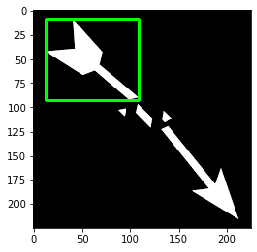

In [0]:
img = _downloadImage('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8amhxBfrtf4Xcnf3jQOKUn2PhqsxMRj-JbCNpkOze6tv_4oiV&s')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find contour
contours, hierarchy = cv2.findContours(imgray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Tìm ra diện tích của toàn bộ các contours
area_cnt = [cv2.contourArea(cnt) for cnt in contours]
area_sort = np.argsort(area_cnt)[::-1]
# Trích xuất contour lớn nhất
cnt = contours[area_sort[0]]
x,y,w,h = cv2.boundingRect(cnt)
print('centroid: ({}, {}), (width, height): ({}, {})'.format(x, y, w, h))
# Vẽ bounding box
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)

pixelpoints shape use numpy: (1865, 2)
pixelpoints shape use cv2: (1865, 1, 2)


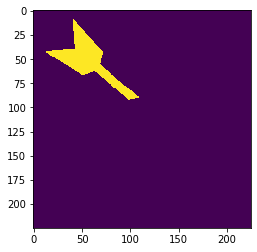

In [0]:
# Khởi tạo contour mask zero
mask = np.zeros(imgray.shape, np.uint8)
# Vẽ contour trên back ground mask zero
cv2.drawContours(mask,[cnt],0,255,-1)
plt.imshow(mask)
# Lấy ra toàn bộ các points có giá trị khác 0
pixelpoints = np.transpose(np.nonzero(mask))
print('pixelpoints shape use numpy: {}'.format(pixelpoints.shape))
# Hoặc cũng có thể dùng hàm cv2.findNoneZero()
pixelpoints = cv2.findNonZero(mask)
print('pixelpoints shape use cv2: {}'.format(pixelpoints.shape))

**7\. Trích xuất Min, Max value và vị trí của chúng**

Chúng ta có thể tìm ra các điểm có giá trị cường độ ảnh lớn nhất và nhỏ nhất kèm theo vị trí tọa độ của chúng.

In [0]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray, mask = mask)
print('(min, max) values ({}, {})'.format(min_val, max_val))
print('(min, max) location ({}, {})'.format(min_loc, max_loc))

(min, max) values (11.0, 255.0)
(min, max) location ((24, 50), (42, 11))


**8. Trích xuất trung bình cường độ màu sắc**

Chúng ta có thể tìm ra trung bình màu sắc của một object thông qua hàm `cv2.mean()` như sau:

In [0]:
mean_val = cv2.mean(img, mask = mask)

**9/. Trích xuất các điểm ngoài cùng**

Các điểm ngoài cùng là những điểm nằm ở ngoài cùng của object tại các vị trí `top, bottom, right, left`.

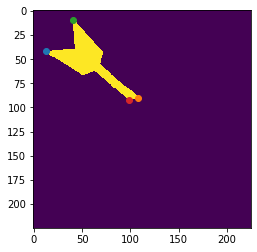

In [0]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

plt.imshow(mask)
plt.scatter(x = leftmost[0], y = leftmost[1])
plt.scatter(x = rightmost[0], y = rightmost[1])
plt.scatter(x = topmost[0], y = topmost[1])
plt.scatter(x = bottommost[0], y = bottommost[1])

### 2.4.6. Tìm bounding box trong Object detection

Trong Object Detection, để huấn luyện các mô hình chúng ta sẽ cần phải gán nhãn cho các vật thể trong hình và tìm ra tọa độ tâm, kích thước width, height của bounding box bao quanh vật thể. Nếu gãn nhãn bằng tay sẽ khá mất thời gian và công sức. Có một các nhanh hơn tự động khoanh vùng các bounding box của các vật thể trong ảnh trong opencv. Hãy cùng xem.

Gỉa sử chúng ta có một dãy các chữ số ngẫu nhiên như sau:



(<matplotlib.axes._subplots.AxesSubplot at 0x7f4646b9bc88>,
 Text(0.5, 1.0, 'Gray of Binary Image'))

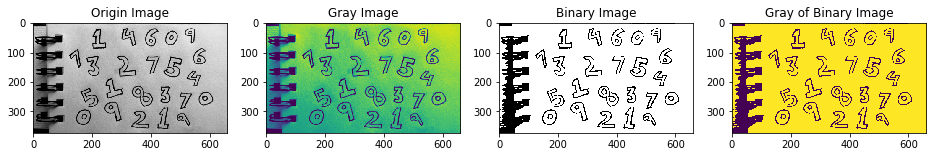

In [0]:
img = _downloadImage('https://i0.wp.com/cdn-images-1.medium.com/max/2400/1*LmxW8FDfXZJl5yvESvjP7Q.jpeg?resize=660%2C373&ssl=1')
# Chuyển ảnh sang gray image
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Chuyển sang ảnh nhị phân
_, imgBi = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
# Chuyển ảnh sang gray image
imgGrayBi = cv2.cvtColor(imgBi, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(16, 4))
plt.subplot(141), plt.imshow(img), plt.title('Origin Image')
plt.subplot(142), plt.imshow(imgGray), plt.title('Gray Image')
plt.subplot(143), plt.imshow(imgBi), plt.title('Binary Image')
plt.subplot(144), plt.imshow(imgGrayBi), plt.title('Gray of Binary Image')

Tìm ra các contour từ ảnh nhị phân đã được chuyển sang gray

In [0]:
contours, hierarchy = cv2.findContours(imgGrayBi, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Sắp xếp các contour theo diện tích giảm dần:
area_cnt = [cv2.contourArea(cnt) for cnt in contours]
area_sort = np.argsort(area_cnt)[::-1]
# Top 20 contour có diện tích lớn nhất
area_sort[:20]

array([ 45,  78,  89,  93,  63,  55,  83,  53,  95, 110,  74,  60,  70,
       113,  99, 106,  76, 117,  56,  91])

Vẽ bounding box cho 25 contours có diện tích lớn nhất

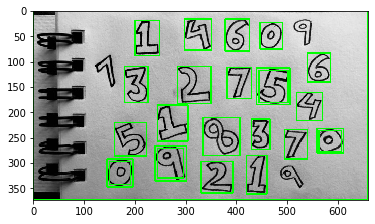

In [0]:
def _drawBoundingBox(img, cnt):
  x,y,w,h = cv2.boundingRect(cnt)
  img = cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,0),2)
  return img

imgOrigin = img.copy()
# Vẽ bounding box cho 25 contours có diện tích lớn nhất
for i in area_sort[:25]:
  cnt = contours[i]
  imgOrigin = _drawBoundingBox(imgOrigin, cnt)
  
plt.imshow(imgOrigin)

Như vậy hầu hết các chữ số đã được tìm ra bouding box mà không phải tốn công sức từ người. Việc còn lại của chúng ta chỉ là gán nhãn cho từng bounding box. Theo cách này chúng ta có thể tiết kiệm được khoảng 80% thời gian so với xây dựng một bộ dữ liệu huấn luyện thủ công.

Ta nhận thấy có một số bounding box overlap nhau như các bounding box quanh số 0, 5, 9. Chúng ta có thể sử dụng hàm non-max suppression như bên dưới để triệt tiêu các bounding box overlap nhau và chỉ giữ lại các bounding box lớn nhất.

In [0]:
import numpy as np

def non_max_suppression(boxes, overlapThresh):
  '''
  boxes: List các bounding box
  overlapThresh: Ngưỡng overlapping giữa các hình ảnh
  '''
  # Nếu không có bounding boxes thì trả về empty list
  if len(boxes)==0:
    return []
  # Nếu bounding boxes nguyên thì chuyển sang float.
  if boxes.dtype.kind == "i":
    boxes = boxes.astype("float")

  # Khởi tạo list của index được lựa chọn
  pick = []

  # Lấy ra tọa độ của các bounding boxes
  x1 = boxes[:,0]
  y1 = boxes[:,1]
  x2 = boxes[:,2]
  y2 = boxes[:,3]

  # Tính toàn diện tích của các bounding boxes và sắp xếp chúng theo thứ tự từ bottom-right, chính là tọa độ theo y của bounding box
  area = (x2 - x1 + 1) * (y2 - y1 + 1)
  idxs = np.argsort(y2)
  # Khởi tạo một vòng while loop qua các index xuất hiện trong indexes
  while len(idxs) > 0:
    # Lấy ra index cuối cùng của list các indexes và thêm giá trị index vào danh sách các indexes được lựa chọn
    last = len(idxs) - 1
    i = idxs[last]
    pick.append(i)

    # Tìm cặp tọa độ lớn nhất (x, y) là điểm bắt đầu của bounding box và tọa độ nhỏ nhất (x, y) là điểm kết thúc của bounding box
    xx1 = np.maximum(x1[i], x1[idxs[:last]])
    yy1 = np.maximum(y1[i], y1[idxs[:last]])
    xx2 = np.minimum(x2[i], x2[idxs[:last]])
    yy2 = np.minimum(y2[i], y2[idxs[:last]])

    # Tính toán width và height của bounding box
    w = np.maximum(0, xx2 - xx1 + 1)
    h = np.maximum(0, yy2 - yy1 + 1)

    # Tính toán tỷ lệ diện tích overlap
    overlap = (w * h) / area[idxs[:last]]

    # Xóa index cuối cùng và index của bounding box mà tỷ lệ diện tích overlap > overlapThreshold
    idxs = np.delete(idxs, np.concatenate(([last],
      np.where(overlap > overlapThresh)[0])))
  # Trả ra list các index được lựa chọn
  return boxes[pick].astype("int")
 
boundingBoxes = [cv2.boundingRect(cnt) for cnt in contours]
boundingBoxes = np.array([(x,y,x+w,y+h) for (x,y,w,h) in boundingBoxes])
pick = non_max_suppression(boundingBoxes, 0.5)

In [0]:
x,y,w,h = cv2.boundingRect(cnt)

# Vẽ bounding box cho 25 contours có diện tích lớn nhất
boundingBoxes = []
for i in area_sort[:25]:
  cnt = contours[i]
  x,y,w,h = cv2.boundingRect(cnt)
  x1, y1, x2, y2 = x, y, x+w, y+h
  boundingBoxes.append((x1, y1, x2, y2))

# Remove đi bounding box parent (chính là khung hình bound toàn bộ hình ảnh), nếu không khi áp dụng non max suppression chỉ giữ lại bounding box này
boundingBoxes = [box for box in boundingBoxes if box[:2] != (0, 0)]
boundingBoxes = np.array(boundingBoxes)
pick = non_max_suppression(boundingBoxes, 0.5)

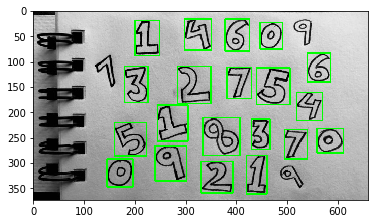

In [0]:
imgOrigin = img.copy()
for (startX, startY, endX, endY) in pick:
    imgOrigin = cv2.rectangle(imgOrigin, (startX, startY), (endX, endY), (0, 255, 0), 2)
plt.imshow(imgOrigin)

Như vậy các bounding box overlap nhau ở các vị trí số 0, 5, 9 đã được triệt tiêu để giữ lại 1 bounding box lớn nhất. Chúng ta cũng có thể crop các ảnh theo các bounding box như sau:

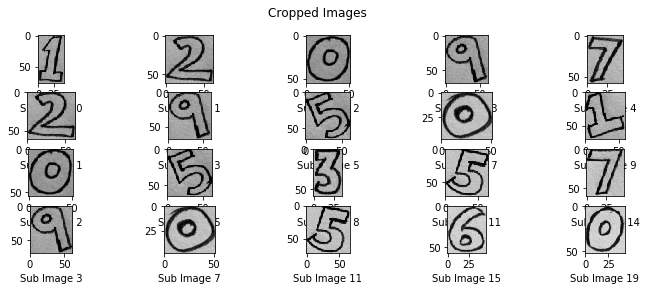

In [0]:
def _cropImage(x1, y1, x2, y2, img):
  if np.ndim(img) == 3:
    crop = img[y1:y2, x1:x2, :]
  else:
    crop = img[y1:y2, x1:x2]
  return crop

crop_images = [_cropImage(x1, y1, x2, y2, img) for (x1, y1, x2, y2) in pick]

fg, ax = plt.subplots(4,5,figsize=(12, 4))
fg.suptitle('Cropped Images')

for i in np.arange(4):
  for j in np.arange(5):
    try:
      ax[i,j].imshow(crop_images[i+j+j*i])
      ax[i,j].set_xlabel('Sub Image '+str(i+j+j*i))
    except:
      next

Sau khi đã tách biệt được từng ảnh của vật thể, ta có thể đưa chúng vào một mô hình pretrain chuyên nhận diện kí tự chữ số viết tay để gán nhãn tự động. Hướng tới tự động hóa quá trình gán nhãn dữ liệu thay vì còn người gán nhãn. Tôi ước tính sẽ giảm thiểu được cho bạn 10% thời gian nữa. Bạn sẽ có dôi ra nhiều thời gian hơn để huấn luyện mô hình, rất hữu ích phải không nào?

# 3. Kết luận

Như vậy tôi đã giới thiệu tới các bạn gần hết những phương pháp xử lý ảnh cơ bản sử dụng opencv. Ngoài opencv thì còn rất nhiều các tools, packages và frameworks khác cũng hỗ trợ các hàm tiện ích trong tiền xử lý ảnh như albumentation, keras, pytorch. Ý tưởng chung của chúng đều ra xoay quanh các kĩ thuật chính trong xử lý ảnh đó là:

* Các dịch chuyển hình học như dịch chuyển phải, trái, lên, xuống, xoay ảnh, lật ảnh, biến đổi phối cảnh.
* Các phương pháp lọc nhiễu, làm mờ thông qua bộ lọc.
* Phương pháp phát hiện edge sử dụng bộ lọc canny hoặc ngưỡng threshold.
* Xác định các contours theo cường độ màu sắc tương đồng.
* Xác định bounding box của vật thể.
* Sử dụng non-max suppression để triệt tiêu các bounding box chồng lấn.

Tiền xử lý ảnh là một trong những phương pháp rất quan trọng giúp tăng cường dữ liệu (data augumentation) cho huấn luyện. Một thuật toán phân loại hoặc phát hiện vật thể có thể được học đa dạng và tổng quát hơn nếu quá trình tiền xử lý dữ liệu tạo ra nhiều ảnh hơn cho nó. 

Trên thực tế có nhiều trường hợp mô hình thể hiện trên dữ liệu huấn luyện thì rất tốt nhưng khi áp dụng vào thực tế lại không tốt. Nguyên nhân có thể đến từ khác biệt của hình ảnh huấn luyện và hình ảnh dự báo về cường độ màu sắc ảnh, độ phân giải, chất lượng ảnh, mức độ chi tiết, mức độ bao quát của ,....

Do đó ứng dụng tiền xử lý dữ liệu sẽ giúp ta cover được hầu hết các trường hợp trên và giúp nâng cao độ chính xác, cải thiện khả năng phân loại, nhận diện vật thể.

Cũng nhờ image preprocessing mà chúng ta tiết kiệm được chi phí thời gian cho quá trình chuẩn bị dữ liệu cho huấn luyện. Từ đó có thể tập trung vào việc tinh chỉnh cấu trúc và tunning mô hình để cải thiện chất lượng.

Và còn rất nhiều các lợi ích khác nữa của tiền xử lý dữ liệu ảnh mà chúng ta có thể áp dụng.

Hi vọng sau bài viết này bạn đọc có một cái nhìn khái quát hơn về các phương pháp tiền xử lý dữ liệu ảnh, trường hợp, và cách thức áp dụng chúng.

Cuối cùng, không thể thiếu sau mỗi bài viết của khanh blog là những tài liệu mà tôi đã tham khảo.


# 4. Tài liệu
1. [opencv documentation python](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html)
2. [Non-Maximum Suppression](https://www.pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/)
3. [Image moment wiki](https://en.wikipedia.org/wiki/Image_moment)
4. [image preprocessing in diabetic retinopathy](https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy)
5. [Affine Transformation - wiki](https://en.wikipedia.org/wiki/Affine_transformation)
6. [albumentations package document](https://pypi.org/project/albumentations/0.0.10/)
7. [Tensorflow Keras image preprocessing](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image)
8. [Improve OCR accuracy by image preprocessing](https://docparser.com/blog/improve-ocr-accuracy/)
9. [Canny Edge Detector - wiki](https://en.wikipedia.org/wiki/Canny_edge_detector)
10. [Khao khát học máy bản Tiếng Việt - Tác giả Andrew Ng - Tiep Vu và cộng sự dịch](https://github.com/aivivn/Machine-Learning-Yearning-Vietnamese-Translation)